1) Loading the Taxis Dataset

In [12]:
import seaborn as sns
# Load the 'taxis' dataset
df = sns.load_dataset("taxis")

In [13]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


2) Handling Missing Values


In [14]:
# Check for missing values in the dataset and identify columns with missing data.
print("\n Checking for Missing Values:")
print(df.isnull().sum())


 Checking for Missing Values:
pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [10]:
categorical_columns = df.select_dtypes('O').columns
categorical_columns

Index(['color', 'payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough',
       'dropoff_borough'],
      dtype='object')

In [35]:
# To get unique values for the 'payment' column, you can use:
print("Unique values in 'payment' column:")
print(df['payment'].unique())


Unique values in 'payment' column:
['cash' 'credit card']


In [30]:
df.shape

(6341, 14)

In [16]:
# Drop rows with missing values in critical columns
critical_cols = ['payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']
df.dropna(subset=critical_cols, inplace=True)

# Check missing values after dropping
print("\n Missing Values After Removing Critical Nulls:")
print(df.isnull().sum())

# Check remaining rows
print("\n  Remaining rows after cleaning:", len(df))


 Missing Values After Removing Critical Nulls:
pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

  Remaining rows after cleaning: 6341


3) Visualizations using Matplotlib/Pandas Plot:

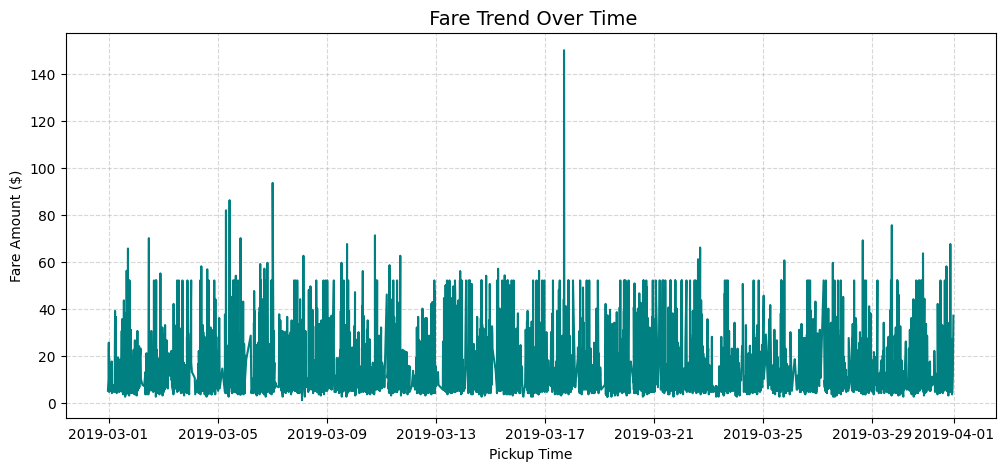

In [23]:
# Line Chart
import pandas as pd
import matplotlib.pyplot as plt

# Convert pickup time to datetime format
df['pickup'] = pd.to_datetime(df['pickup'])

# Sort data by pickup time (for proper time sequence)
df = df.sort_values('pickup')

# Plot line chart
plt.figure(figsize=(12,5))
plt.plot(df['pickup'], df['fare'], color='teal', linewidth=1.5)

# Add labels and title
plt.title(" Fare Trend Over Time", fontsize=14)
plt.xlabel("Pickup Time")
plt.ylabel("Fare Amount ($)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

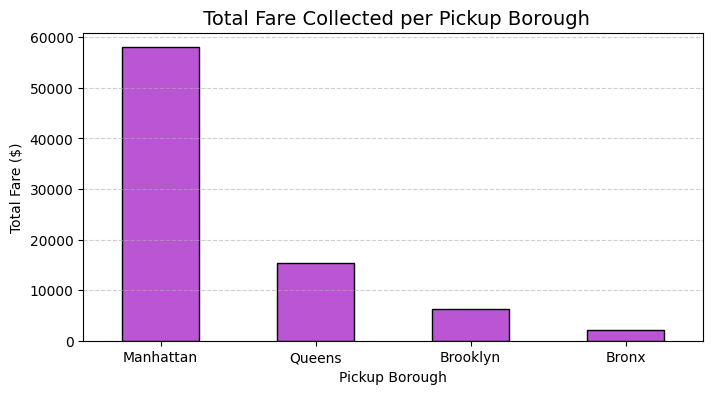

In [47]:
# Bar Chart
# Group the data by pickup_borough and sum the fares
fare_by_borough = df.groupby('pickup_borough')['fare'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(8,4))
fare_by_borough.plot(kind='bar', color='mediumorchid', edgecolor='black')

# Add labels and title
plt.title(" Total Fare Collected per Pickup Borough", fontsize=14)
plt.xlabel("Pickup Borough")
plt.ylabel("Total Fare ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(rotation=0)

# Display the chart
plt.show()


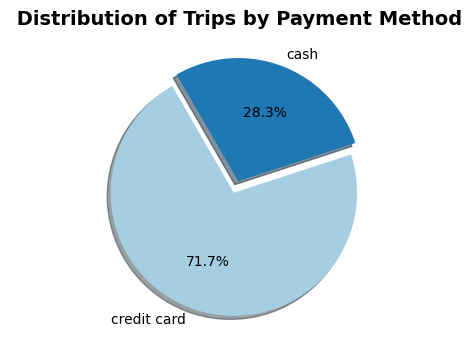

In [29]:
# Pie Chart
# Count the number of trips per payment method
payment_counts = df['payment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,4))
plt.pie(payment_counts,
        labels=payment_counts.index,        # category names
        autopct='%1.1f%%',                  # show percentages with 1 decimal
        startangle=120,                     # start rotation
        shadow=True,                        # slight shadow for style
        explode=[0.05]*len(payment_counts), # slightly separate slices
        colors=plt.cm.Paired.colors)        # nice color palette

# Add title
plt.title(" Distribution of Trips by Payment Method", fontsize=14, fontweight='bold')

plt.show()

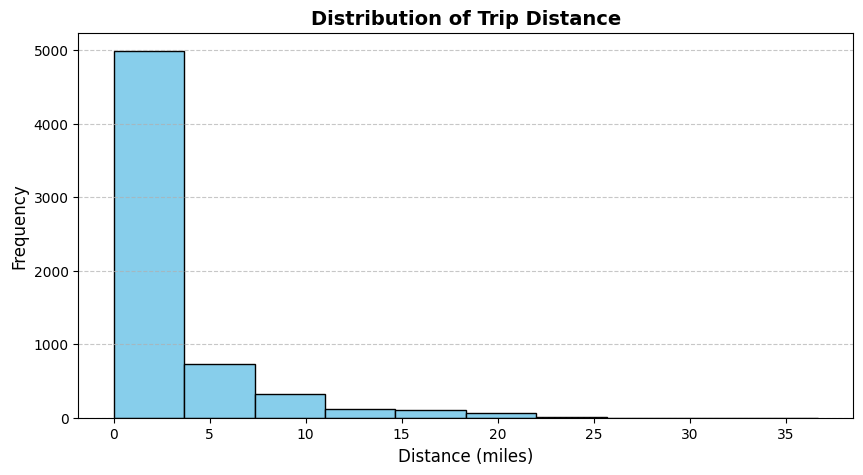

In [38]:
# Plot histogram for distance
plt.figure(figsize=(10, 5))
plt.hist(df['distance'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Distribution of Trip Distance", fontsize=14, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Optional grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

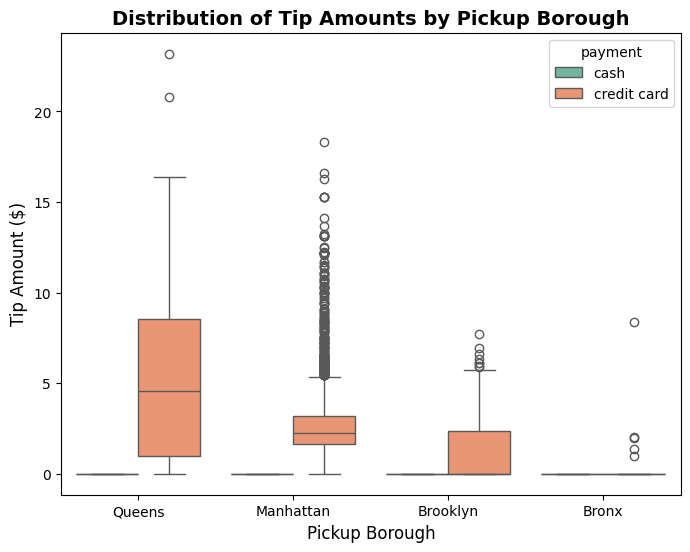

In [49]:
# Box Plot
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='pickup_borough', y='tip', data=df, palette='Set2', hue='payment')

# Add labels and title
plt.title("Distribution of Tip Amounts by Pickup Borough", fontsize=14, fontweight='bold')
plt.xlabel("Pickup Borough", fontsize=12)
plt.ylabel("Tip Amount ($)", fontsize=12)

# Show the plot
plt.show()

Visualizations using Seaborn:

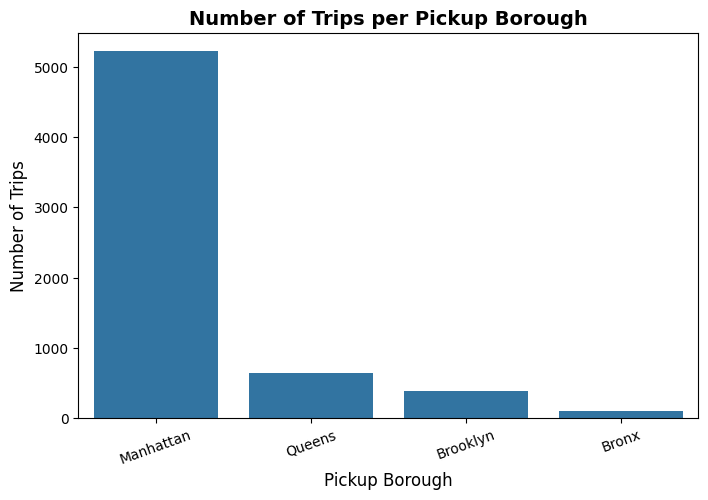

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(
    x='pickup_borough',
    data=df,
    order=df['pickup_borough'].value_counts().index  # sorts bars by frequency
)
# Add labels and title
plt.title("Number of Trips per Pickup Borough", fontsize=14, fontweight='bold')
plt.xlabel("Pickup Borough", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)

# Rotate x-labels for readability
plt.xticks(rotation=20)

# Show the plot
plt.show()

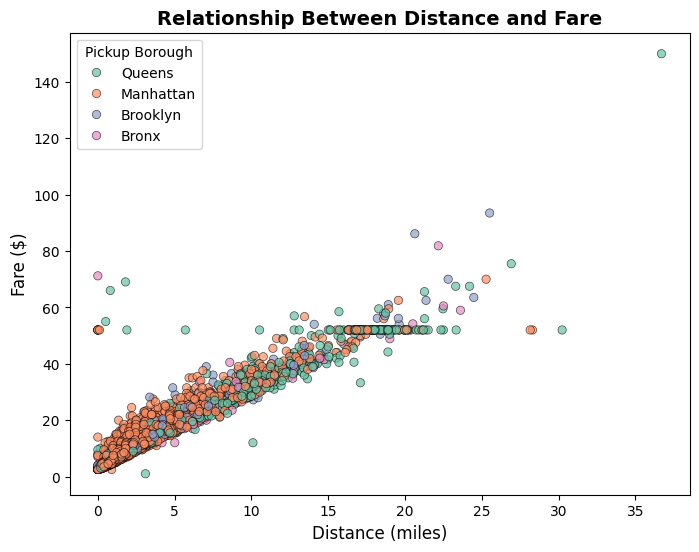

In [57]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='distance',
    y='fare',
    hue='pickup_borough',   # color points by borough 🌈
    data=df,
    palette='Set2',
    alpha=0.7,              # slight transparency for overlapping points
    edgecolor='black'
)

# Add title and axis labels
plt.title("Relationship Between Distance and Fare", fontsize=14, fontweight='bold')
plt.xlabel("Distance (miles)", fontsize=12)
plt.ylabel("Fare ($)", fontsize=12)

# Move the legend neatly
plt.legend(title='Pickup Borough', loc='upper left')

# Show the plot
plt.show()

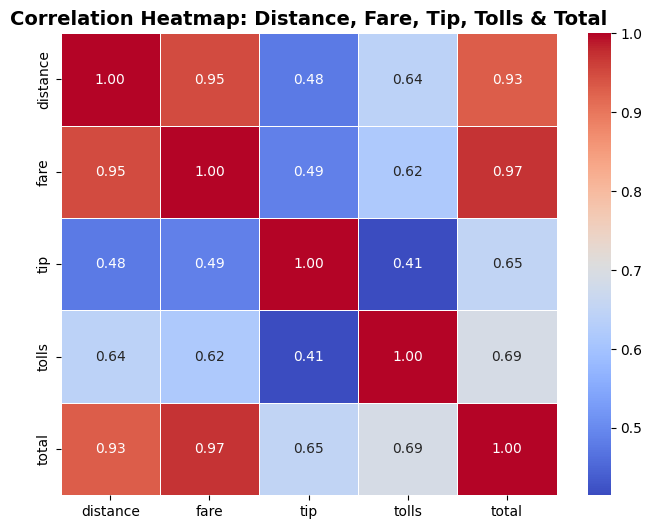

In [59]:
#  Select only the numerical columns we want to analyze
num_cols = ['distance', 'fare', 'tip', 'tolls', 'total']

# Create the correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values inside the boxes
    cmap='coolwarm',   # beautiful red-blue color range
    linewidths=0.5,    # thin lines between cells
    fmt=".2f"          # show only 2 decimal places
)

#  Add title
plt.title("Correlation Heatmap: Distance, Fare, Tip, Tolls & Total", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

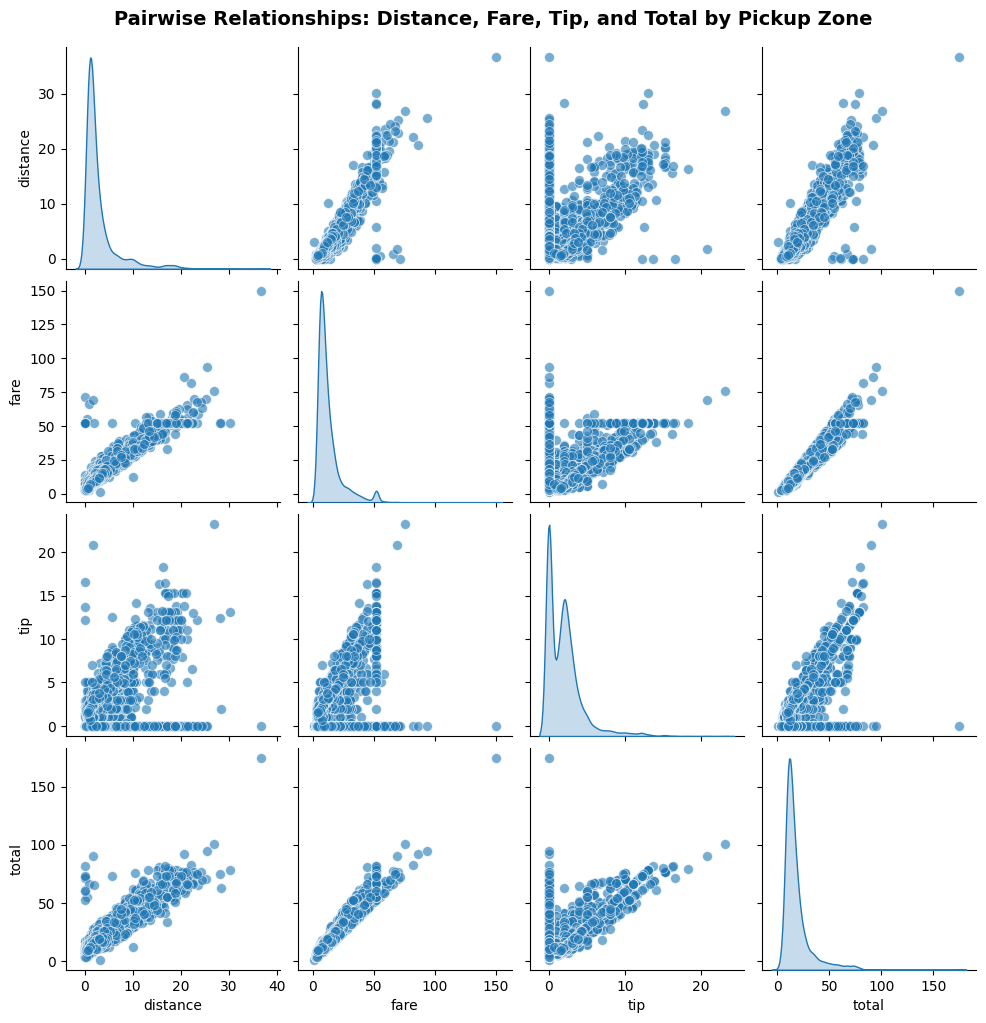

In [61]:
# Create the pair plot
sns.pairplot(
    data=df,
    vars=['distance', 'fare', 'tip', 'total'],  # numeric variables to compare
    #hue='pickup_zone',                          # color by pickup zone 🌈
    #palette='husl',                             # bright and clear colors
    diag_kind='kde',                            # show smooth density on the diagonal
    plot_kws={'alpha': 0.6, 's': 50}            # transparency and point size
)

#  Add a title
plt.suptitle("Pairwise Relationships: Distance, Fare, Tip, and Total by Pickup Zone",
             fontsize=14, fontweight='bold', y=1.02)

plt.show()

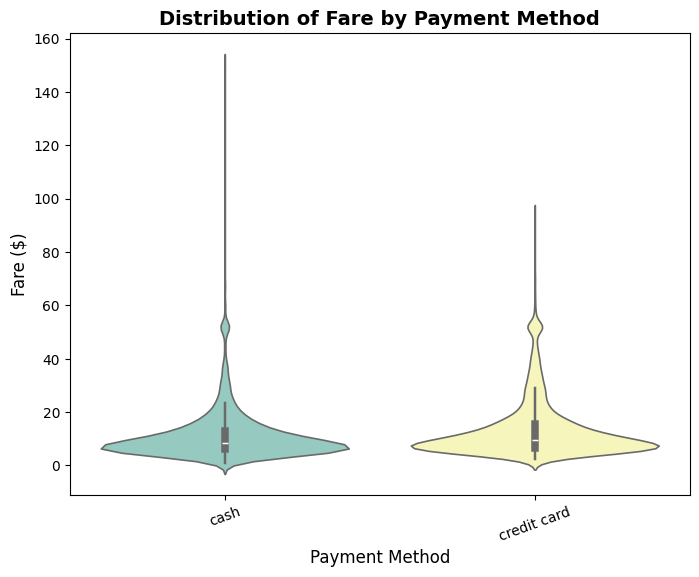

In [64]:
#  Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='payment',         # categorical variable
    y='fare',            # numeric variable
    data=df,
    palette='Set3', hue= 'payment',   # soft colorful palette 🎨
    inner='box',         # shows median and quartiles inside the violin
    linewidth=1.2
)

# Add labels and title
plt.title("Distribution of Fare by Payment Method", fontsize=14, fontweight='bold')
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Fare ($)", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=20)

# Show the plot
plt.show()